In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from neuralNetworkFromScratch import NeuralNetworkFromScratch
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

In [97]:
def standard_scaler(series):
    mu = np.mean(series)
    std = np.std(series)
    normalized = (series - mu) / std
    return normalized

# Example 1: Simple Linear Regression

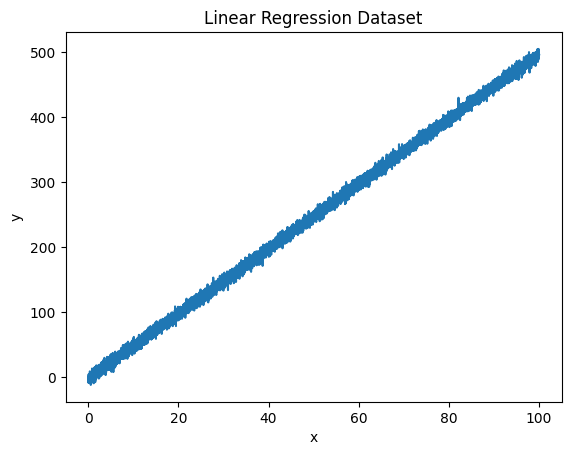

In [3]:
n_points = 10000
a=5
b=-3
alpha = 0.01

x1 = np.linspace(0,100,n_points)
y = a*x1+b

white_noise = np.random.randn(n_points)*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Dataset');

## 2. Preprocessing

In [4]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [5]:
# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [19]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 8, 4, 3, 2, 1], task='regression', learning_rate=1e-5, n_epochs=3000, print_cost=True, lambd=0.1)

Cost after iteration 0: 1691135756.6197932
Cost after iteration 1000: 191.33519330072355
Cost after iteration 2000: 179.22827049098612
Cost after iteration 2999: 173.87886667264908


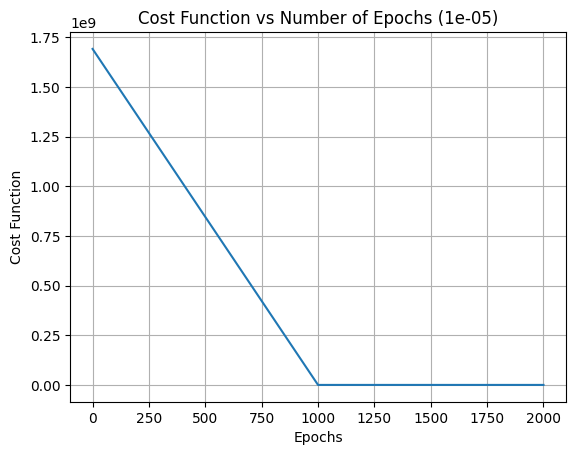

In [20]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True)

In [21]:
pred_train = model.predict(train_x, train_y)

RMSE: 173.8744355900938


In [22]:
pred = model.predict(test_x, test_y)

RMSE: 165.6823159433939


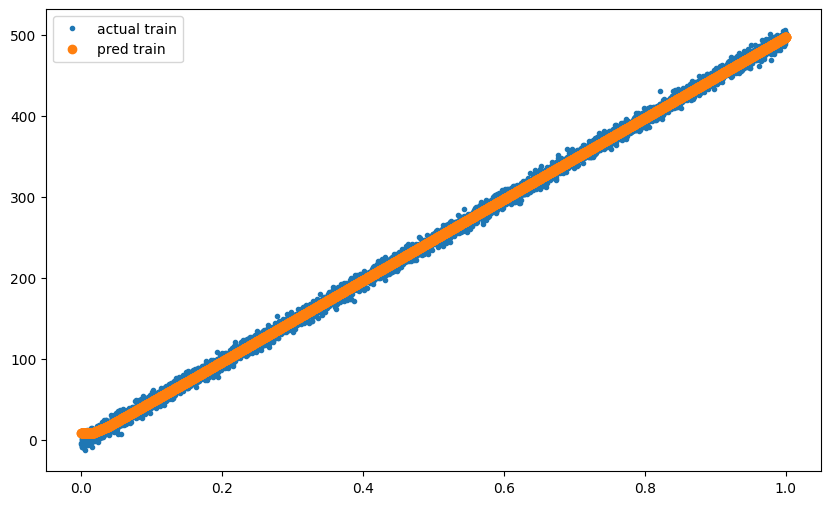

In [23]:
plt.figure(figsize=(10,6))
plt.plot(train_x, train_y, '.', label='actual train')
plt.plot(train_x, pred_train.reshape(-1,1), 'o', label='pred train')
plt.legend();

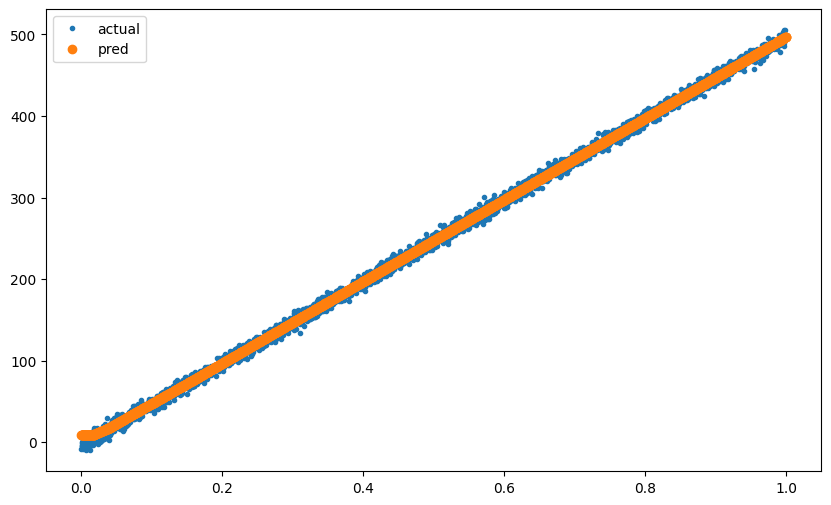

In [24]:
plt.figure(figsize=(10,6))
plt.plot(test_x, test_y, '.', label='actual')
plt.plot(test_x, pred.reshape(-1,1), 'o', label='pred')
plt.legend();

# Example 2: Multiple Linear Regression

## 1. Import Data

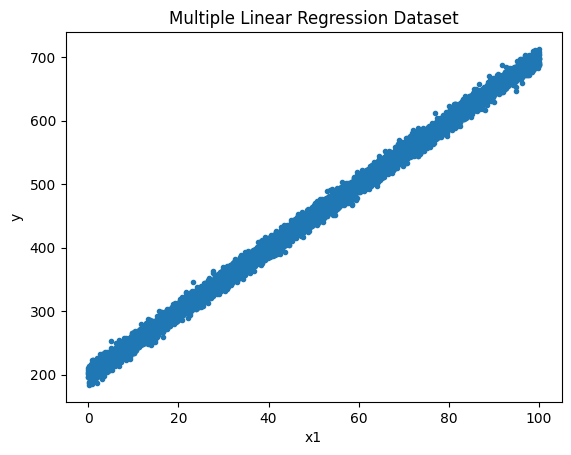

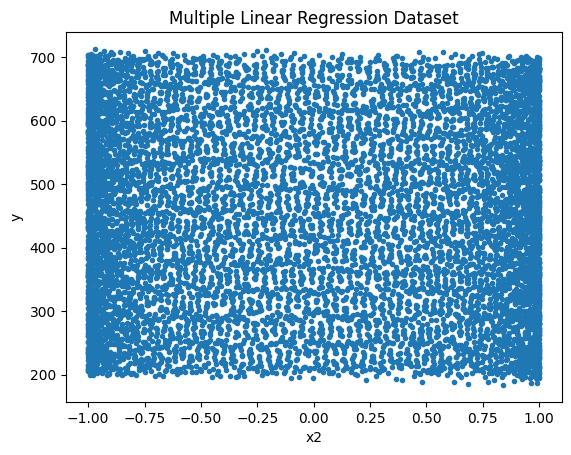

In [25]:
n_points = 10000
a=5
b=-3
c=200
alpha = 0.01

x1 = np.linspace(0,100,n_points)
x2 = np.sin(np.linspace(1250,10526,n_points))

y = a*x1+b*x2+c

white_noise = np.random.randn(n_points)*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1, 'x2':x2})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y, '.')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset')

plt.figure()
plt.plot(x2,y, '.')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset');

## 2. Preprocessing

In [98]:
# Train - Test Split
split_point = int(n_points * 0.7)

train_x = features[:split_point]
test_x = features[split_point:]
train_y = target[:split_point]
test_y = target[split_point:]

# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

In [99]:
for col in train_x.columns:
    train_x[col] = standard_scaler(train_x[col])
    test_x[col] = standard_scaler(test_x[col])

# 3. Prediction

In [138]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1],2, 1], task='regression', learning_rate=5e-6, n_epochs=5000, print_cost=True, lambd=None)

Cost after iteration 0: 12615196938.971085
Cost after iteration 500: 11843277332.297863
Cost after iteration 1000: 7921549878.796365
Cost after iteration 1500: 644171439.395228
Cost after iteration 2000: 1170932.5476941234
Cost after iteration 2500: 5141.089565424691
Cost after iteration 3000: 807.1974944725908
Cost after iteration 3500: 617.865868896556
Cost after iteration 4000: 601.1681309907527
Cost after iteration 4500: 599.5635117235956
Cost after iteration 4999: 599.4079716707324


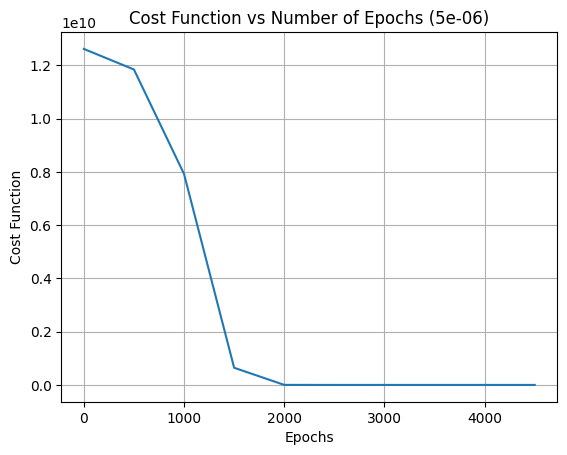

In [139]:
parameters, costs = model.fit(train_x, train_y, print_every=500, plot_cost_function=True)

In [140]:
pred_train = model.predict(train_x, train_y)

RMSE: 599.4078934277966


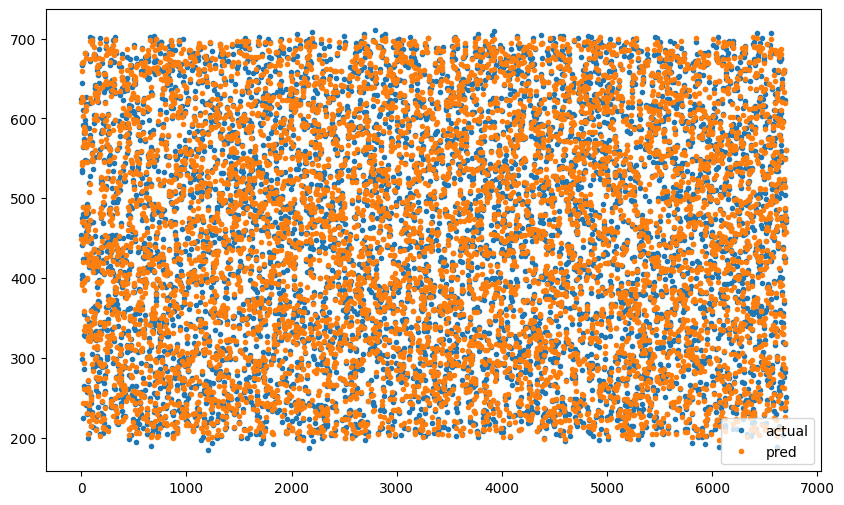

In [141]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,len(train_y),len(train_y)), train_y, '.', label='actual')
plt.plot(np.linspace(0,len(pred_train.T),len(pred_train.T)), pred_train.T, '.', label='pred')
plt.legend();

In [142]:
pred = model.predict(test_x, test_y)

RMSE: 1040.4238043063199


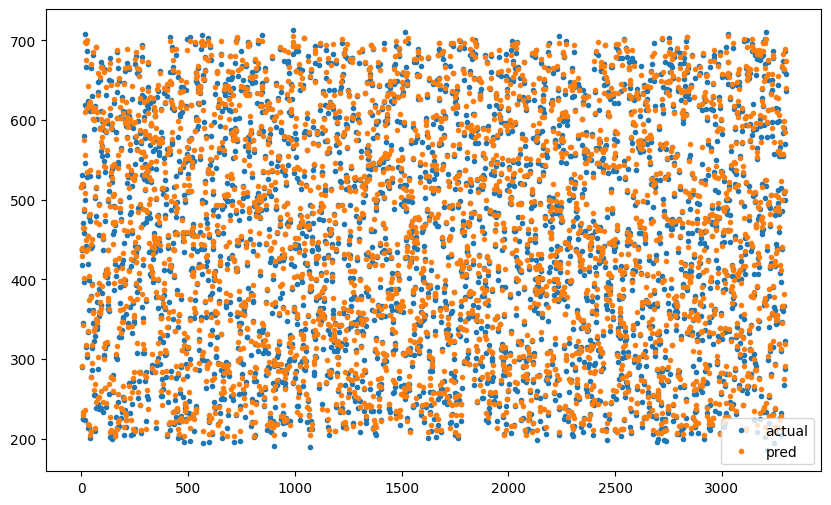

In [143]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,len(test_y),len(test_y)), test_y, '.', label='actual')
plt.plot(np.linspace(0,len(pred.T),len(pred.T)), pred.T, '.', label='pred')
plt.legend();

# Example 3: Fetch California Housing Dataset

## 1. Import Data

In [144]:
data = fetch_california_housing()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=data.target_names)

## 2. Preprocessing

In [152]:
for col in features.columns:
    features[col] = standard_scaler(features[col])

In [153]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)


## 3. Prediction

In [191]:
train_x.shape[0]

13828

In [202]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1],4,2, 1], task='regression', learning_rate=1e-1, n_epochs=10000, print_cost=True)

Cost after iteration 0: 13.836336136102691
Cost after iteration 1000: 0.0542936119693109
Cost after iteration 2000: 0.0351379740713094
Cost after iteration 3000: 0.033263660925674066
Cost after iteration 4000: 0.03213948967587826
Cost after iteration 5000: 0.03195046213060211
Cost after iteration 6000: 0.03173706858572721
Cost after iteration 7000: 0.031096712181265397
Cost after iteration 8000: 0.031093475148008386
Cost after iteration 9000: 0.03098099115118128
Cost after iteration 9999: 0.030926078971897444


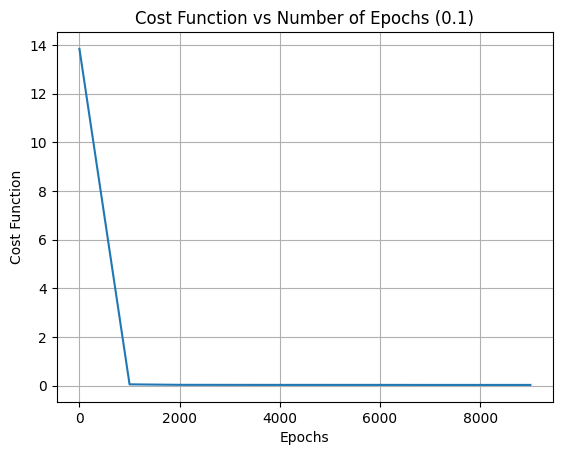

In [203]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True)

In [204]:
pred_train = model.predict(train_x, train_y)
mean_absolute_percentage_error(train_y, pred_train.T)

RMSE: 0.03092238037642019


0.24048258980650575

In [205]:
pred = model.predict(test_x, test_y)
mean_absolute_percentage_error(test_y, pred.T)

RMSE: 0.03333645989335187


0.24819526292553476